# Google Play Store Apps Analysis Using Python

# Importing Libraries & Loading Data

In [2]:
# Install required libraries (if not installed)
!pip install pandas matplotlib seaborn scipy jupyter

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\dell\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [5]:
# Load the datasets
apps = pd.read_csv(r"googleplaystore.csv")
reviews = pd.read_csv(r"googleplaystore_user_reviews.csv")

# Processing data

In [6]:
# Display first few rows of both datasets
print(apps.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [7]:
# Display first few rows of both datasets
print(reviews.head())

                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


# Data Cleaning & Preprocessing

# Handling Missing Values

In [8]:
# Check for missing values
print(apps.isnull().sum())
print(reviews.isnull().sum())

# Drop or fill missing values
apps.dropna(inplace=True)
reviews.dropna(inplace=True)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [11]:
#Convert Installs Column to Numeric
apps["Installs"] = apps["Installs"].astype(str).str.replace(",", "").str.replace("+", "").astype(int)

# Exploratory Data Analysis (EDA) with Graphs & Pie Charts

# A. Distribution of App Categories

C:\Users\dell\AppData\Local\Temp\ipykernel_10448\211561078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


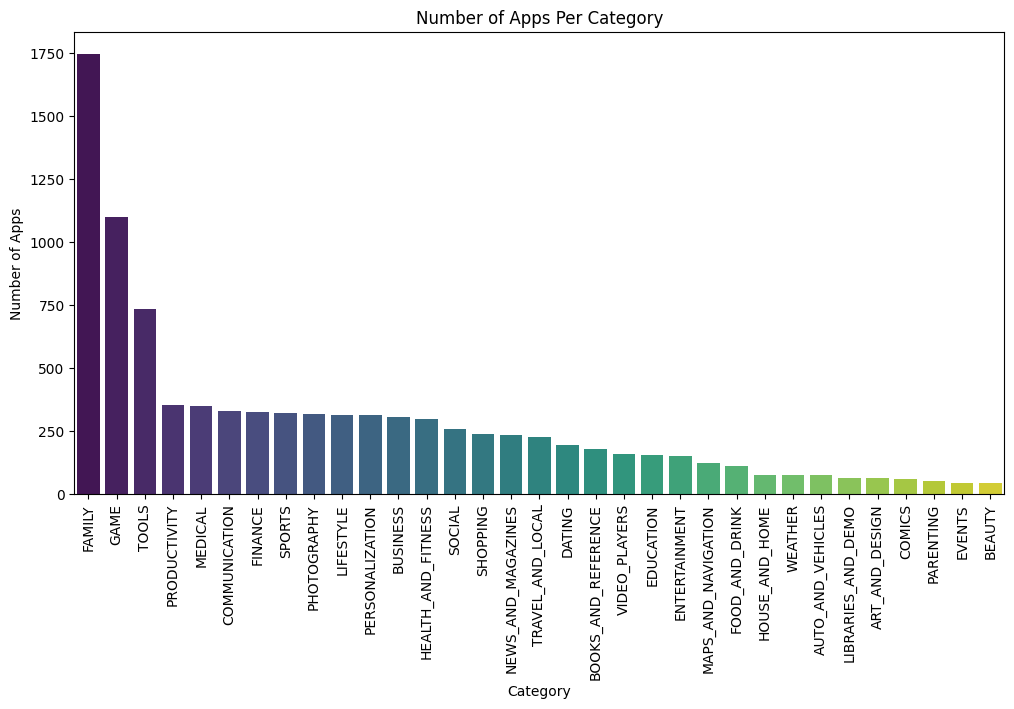

In [12]:
# Count number of apps per category
category_counts = apps["Category"].value_counts()

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.title("Number of Apps Per Category")
plt.show()

# B. Pie Chart of Category Distribution

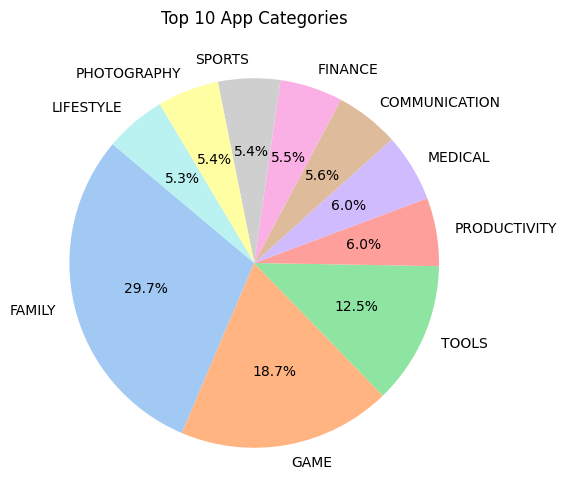

In [13]:
plt.figure(figsize=(10, 6))
plt.pie(category_counts[:10], labels=category_counts.index[:10], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Top 10 App Categories")
plt.show()

# C Distribution of App Ratings

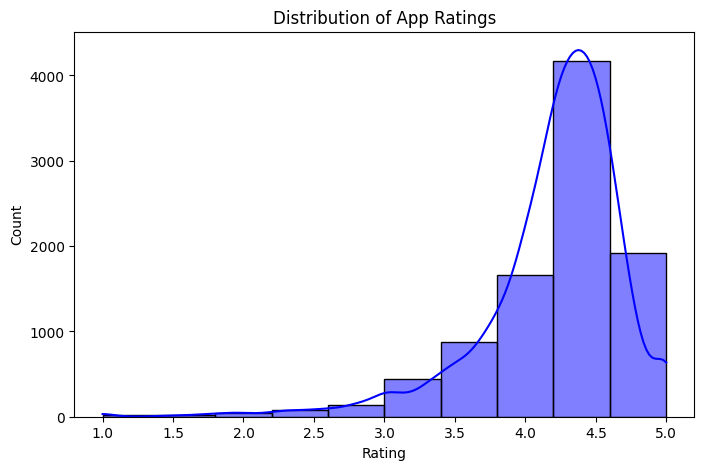

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(apps['Rating'].dropna(), bins=10, kde=True, color="blue")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of App Ratings")
plt.show()

# D App Size vs. Rating

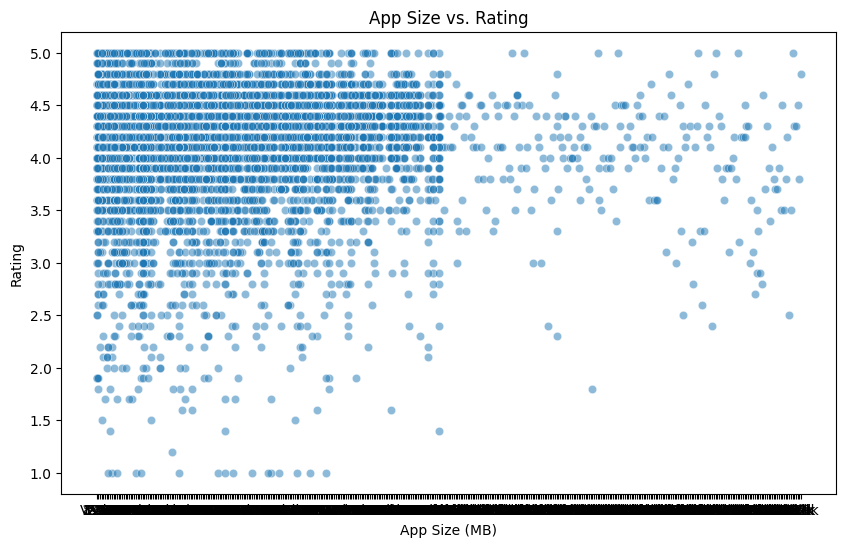

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=apps["Size"], y=apps["Rating"], alpha=0.5)
plt.xlabel("App Size (MB)")
plt.ylabel("Rating")
plt.title("App Size vs. Rating")
plt.show()

# E Top Categories by Number of Installs

C:\Users\dell\AppData\Local\Temp\ipykernel_10448\608783296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_installs.index, y=top_installs.values, palette="coolwarm")


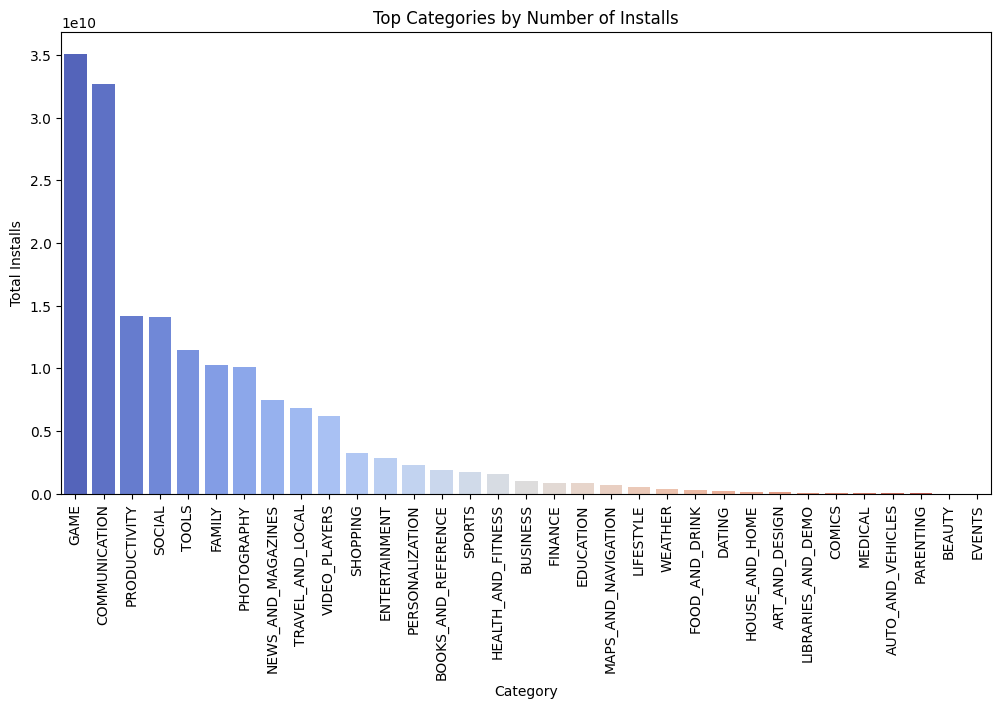

In [16]:
top_installs = apps.groupby("Category")["Installs"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_installs.index, y=top_installs.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Total Installs")
plt.title("Top Categories by Number of Installs")
plt.show()

# User Reviews Analysis

# A. Sentiment Analysis of User Reviews

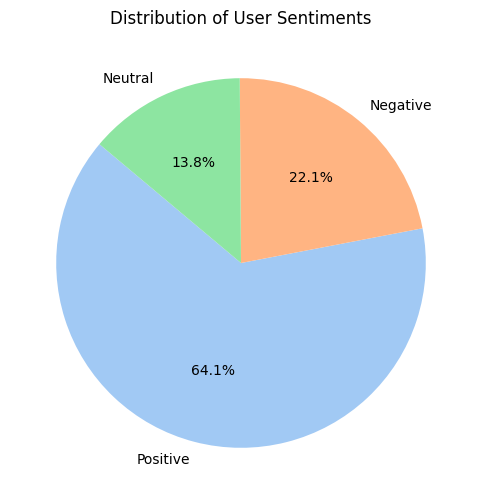

In [17]:
# Count sentiment labels
sentiment_counts = reviews["Sentiment"].value_counts()

# Pie chart of sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribution of User Sentiments")
plt.show()


# B. Most Reviewed Apps

C:\Users\dell\AppData\Local\Temp\ipykernel_10448\3387004932.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviews.index, y=top_reviews.values, palette="Blues_r")


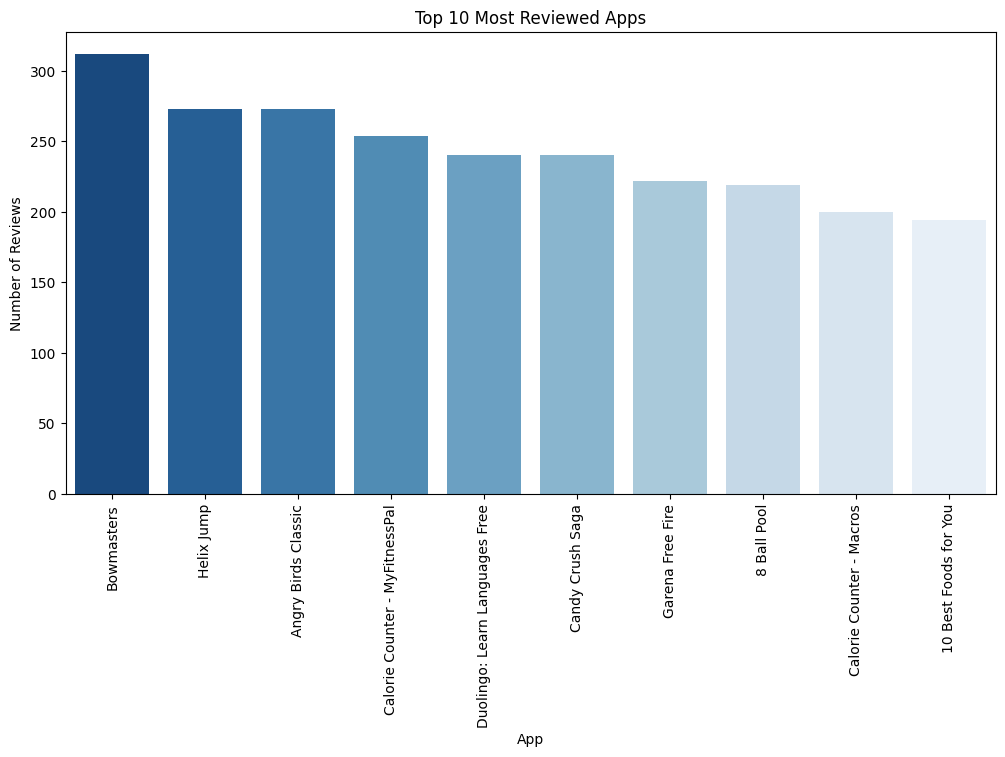

In [18]:
top_reviews = reviews["App"].value_counts()[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviews.index, y=top_reviews.values, palette="Blues_r")
plt.xticks(rotation=90)
plt.xlabel("App")
plt.ylabel("Number of Reviews")
plt.title("Top 10 Most Reviewed Apps")
plt.show()


In [20]:
#thank you!